<a href="https://colab.research.google.com/github/EdgarsLiepa/Bacterie-genome-NCBI-RAPT-result-analysis/blob/main/Catapult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, we will find the best set of catapult factors (an experiment) that will result in a launched ball landing as close to an arbitrary target as possible. We will be training a Gaussian Process regression to try and model the experiment space. We have a budget of 12 runs on the catapult. The catapult factors we will find are:

1. Draw angle
2. Type of ball (projectile)
3. Number of rubber bands

We will start by creating an initial experiment design, where we will select 6 experiments, perform the experiments with the catapult, and record their distances from the target. This will be used as initial training data for our Gaussian Process model and will constitute the first 6 runs of our 12-run budget.

After that, we will decide the next experiment to perform via one of three policies:
1. Exploitation (finding the experiments that result in the smallest distance between the ball and the target)
2. Exploration (finding the experiments that result in the highest uncertainty from the Gaussian Process)
3. Hybrid (finding the experiments that take into account both distance from the target and model uncertainty)

At every iteration, the next experiment will be selected via one of these policies. The experiment is then performed, the distance to the target recorded, and the model re-trained with this new data. After 6 iterations of this, we will perform one final exploitation run to find the best experiment given the model, and perform this best experiment 3 times. After these 3 distances from the target are recorded, we will then calculate the mean and standard deviation of these distances.

# Set up

In [1]:
!git clone https://github.com/pauljensen/PyAutoSci
%cd PyAutoSci

Cloning into 'PyAutoSci'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 168 (delta 103), reused 104 (delta 46), pack-reused 0
Receiving objects: 100% (168/168), 5.36 MiB | 14.70 MiB/s, done.
Resolving deltas: 100% (103/103), done.
/content/PyAutoSci


In [2]:
from FactorSet import *
from gp_update_function import *
from InitStrategies import *
from PlotWrapper import *
from plan_next_experiment import *
import matplotlib.pyplot as plt
from plot_heatmaps import *
from sklearn.gaussian_process.kernels import RBF

# Add factors (variables)

In [3]:
factors = FactorSet()
factors.add_categorical(name="projectile", levels=["pingpong", "whiffle"])
factors.add_continuous(name="draw_angle", minimum=20, maximum=120)
factors.add_ordinal(name="rubber_bands", levels=[1, 2, 3])

# Create and select initial design

## Make Latin Hypercube Sampling, Maximin, and Random designs

In [4]:
n = 6
X_LHS = create_design("LHS",factors,n)
X_maximin = create_design("Maximin",factors,n)
X_random = create_design("Random",factors,n)

/content/PyAutoSci/InitStrategies.py:131: UserWarning: Using discrete factors whose levels are not the same as the number of runs will not result in a true Latin Hypercube sampling design. The discrete factors with different numbers of levels compared to runs: draw_angle, projectile
  warnings.warn("Using discrete factors whose levels are not the same as the number of runs will not result in a true Latin Hypercube sampling design. The discrete factors with different numbers of levels compared to runs: " + str_of_factors)


### Visualize each design

In [8]:
#replace X_LHS with the names of other designs to visualize them
#plot_design(X_LHS,factors)
plot_design(X_maximin,factors)
#plot_design(X_random,factors)

## Choose a design

In [9]:
X = X_maximin
#choose X_LHS, , or X_random

# Record the distances from the target based on the selected design

In [10]:
X

,draw_angle,projectile,rubber_bands
0,61.027281,pingpong,1.0
1,74.740438,whiffle,3.0
2,105.470763,whiffle,1.0
3,112.467240,pingpong,2.0
4,22.922537,whiffle,2.0
5,22.987526,pingpong,3.0


In [11]:
#add your responses in this list in order
y = [100, 240, 12, 230, 62, 66]

# Perform the automated science loop

## Train a Gaussian Process on the initial maximin data and responses

In [12]:
kernel = RBF()
gp = GaussianProcessRegressor(kernel)
gp.optimizer = None
gp = train_model(gp, X, y, factors)

## Iteration 1

### Plot the heat maps

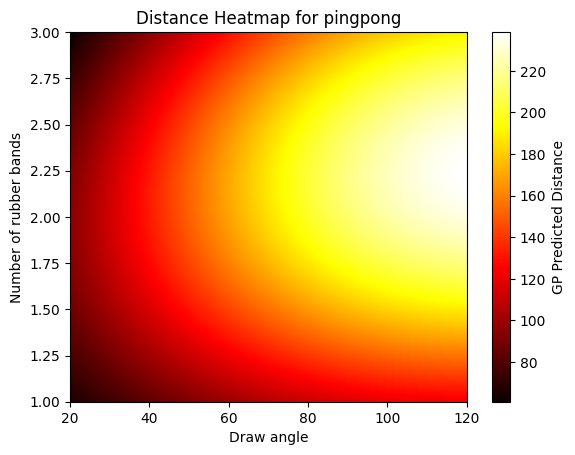

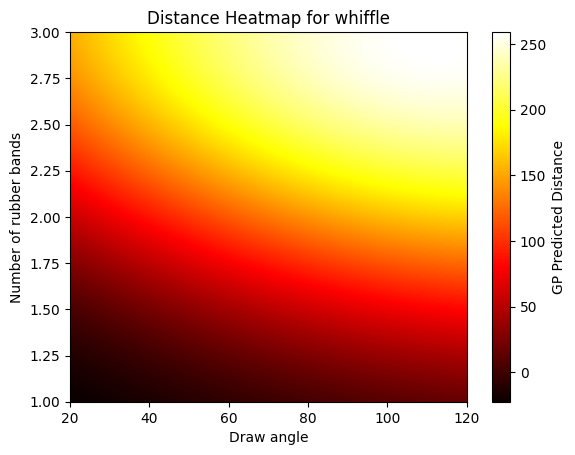

In [13]:
distance_heatmaps(gp, factors) #exploitation

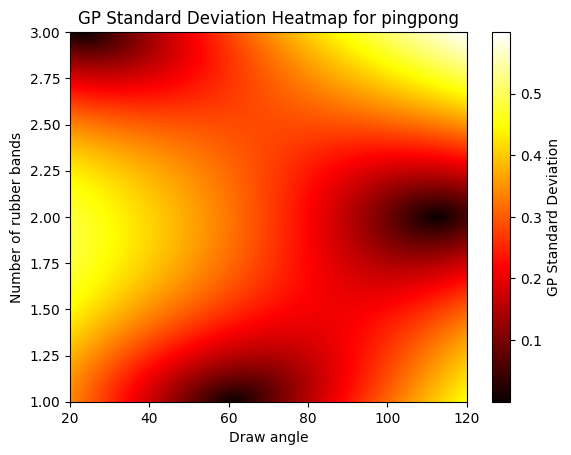

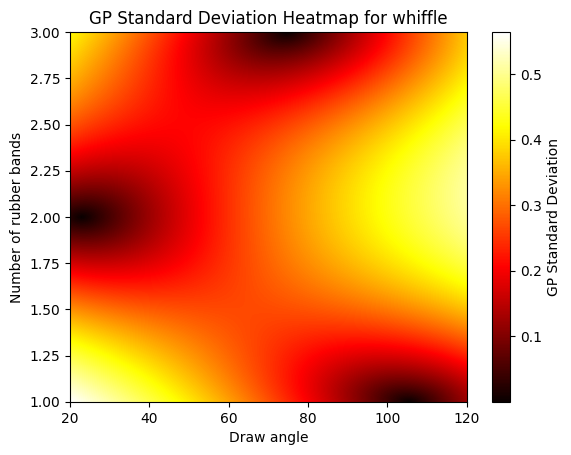

In [14]:
uncertainty_heatmaps(gp, factors) #exploration

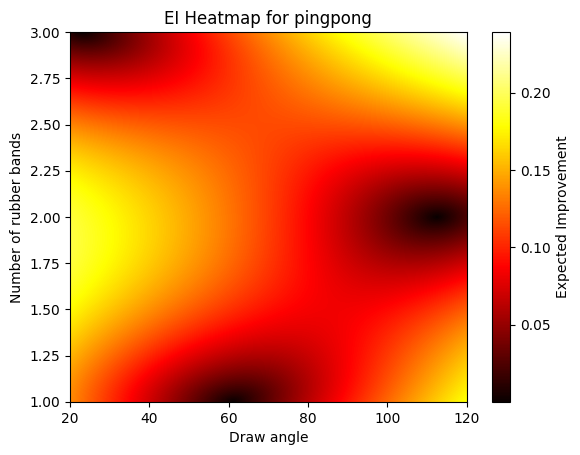

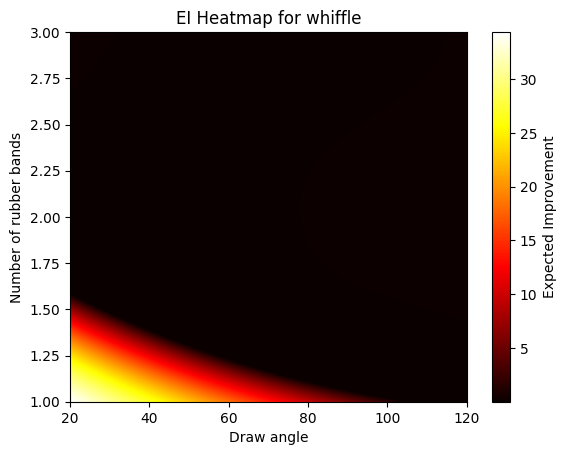

In [15]:
EI_heatmaps(gp, factors) #hybrid

### Select a policy

In [16]:
policy = "Exploration" #"Exploitation", "Exploration", or "EI"

### Select the next experiment to perform based on the chosen policy

In [17]:
X_new, obj_val = plan_next_experiment(gp, factors, policy)

In [18]:
X_new

,draw_angle,projectile,rubber_bands
0,120.0,pingpong,3.0


### Record the distance from the target

In [19]:
y_new = 246#add the distance measurement here

### Update the Gaussian Process with this new experiment

In [20]:
gp = update_model(gp, X_new, y_new, factors)

## Iteration 2

### Plot the heat maps

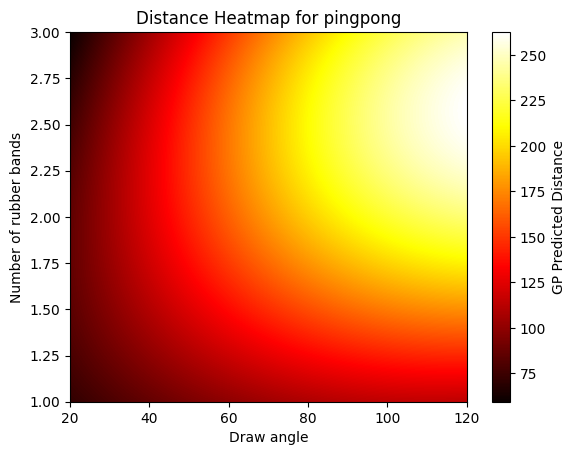

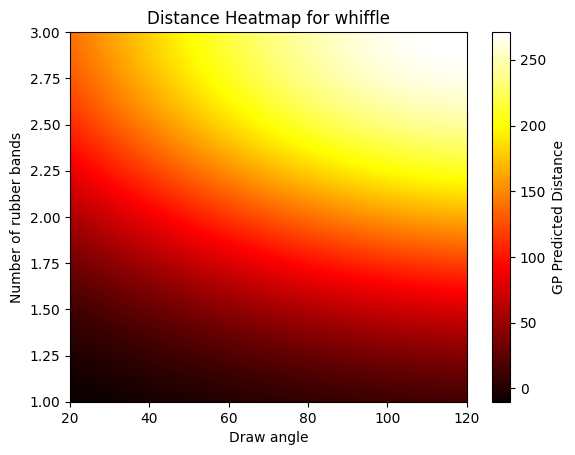

In [21]:
distance_heatmaps(gp, factors) #exploitation

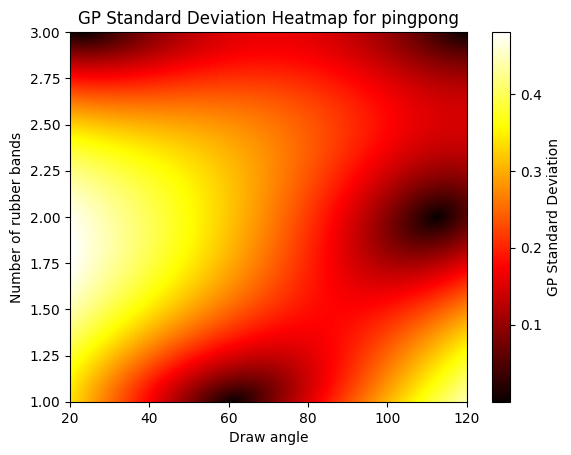

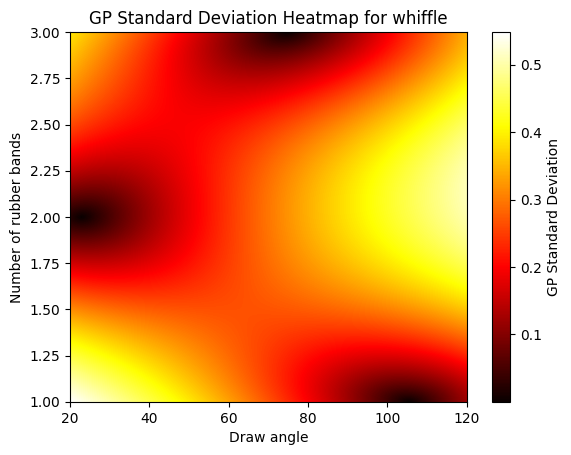

In [22]:
uncertainty_heatmaps(gp, factors) #exploration

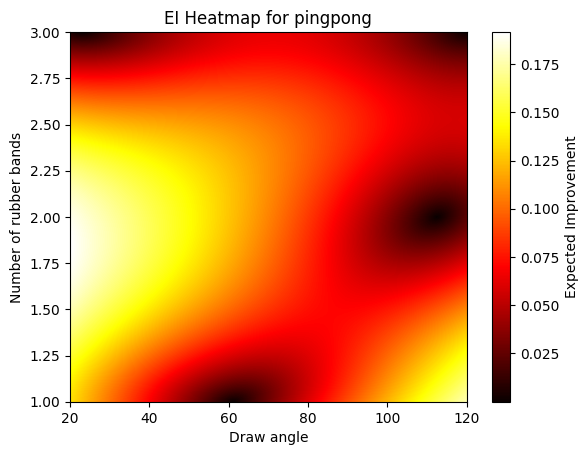

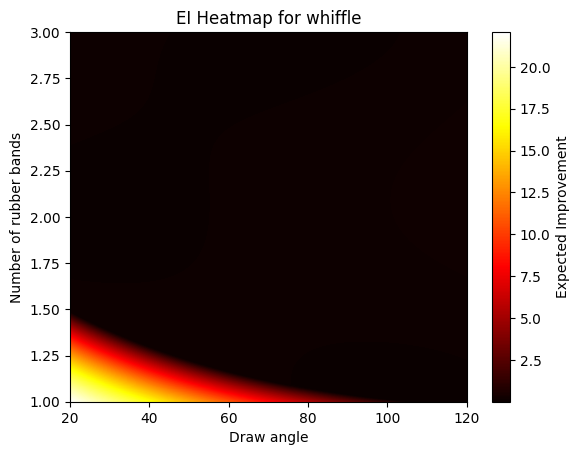

In [23]:
EI_heatmaps(gp, factors) #hybrid

### Select a policy

In [30]:
policy = "Exploration" #"Exploitation", "Exploration", or "EI"

### Select the next experiment to perform based on the chosen policy

In [31]:
X_new, obj_val = plan_next_experiment(gp, factors, policy)

In [32]:
X_new

,draw_angle,projectile,rubber_bands
0,20.0,whiffle,1.0


### Record the distance from the target

In [33]:
y_new = 325#add the distance measurement here

### Update the Gaussian Process with this new experiment

In [34]:
gp = update_model(gp, X_new, y_new, factors)

## Iteration 3

### Plot the heat maps

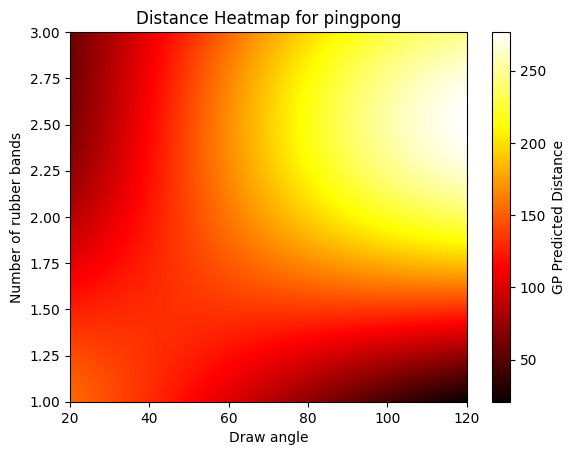

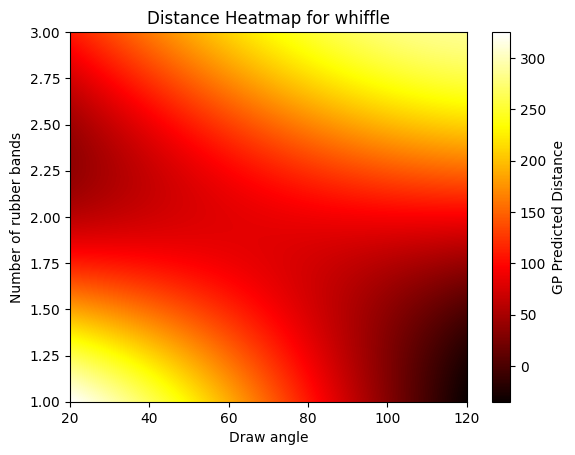

In [35]:
distance_heatmaps(gp, factors) #exploitation

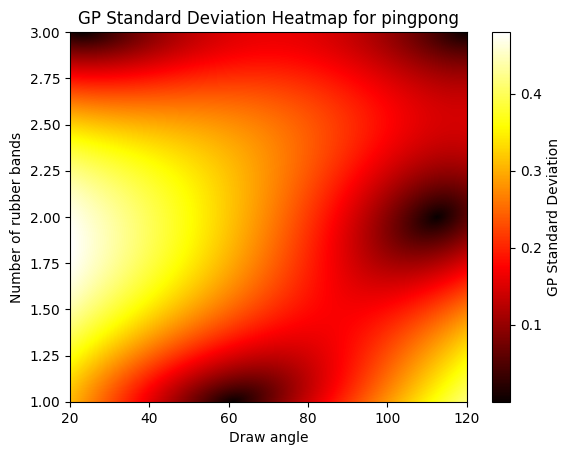

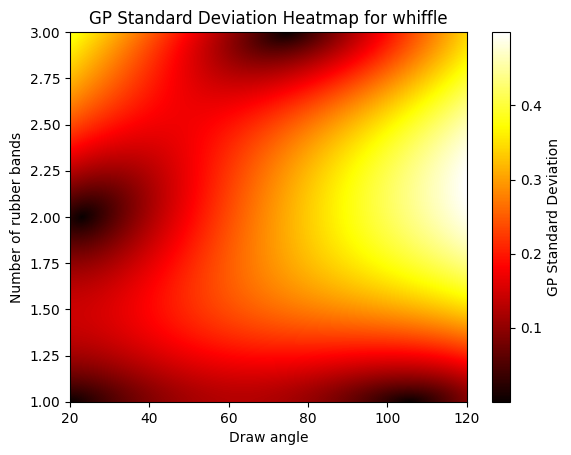

In [36]:
uncertainty_heatmaps(gp, factors) #exploration

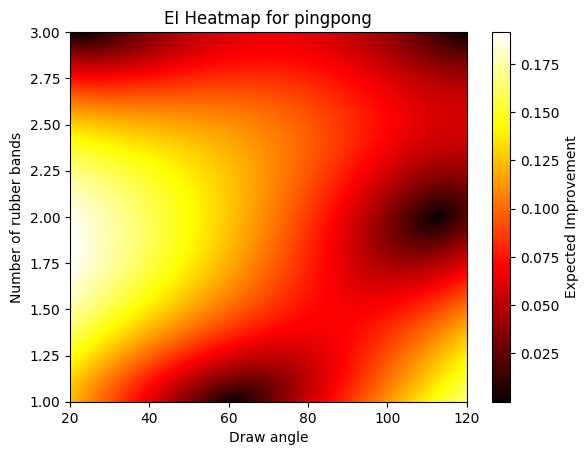

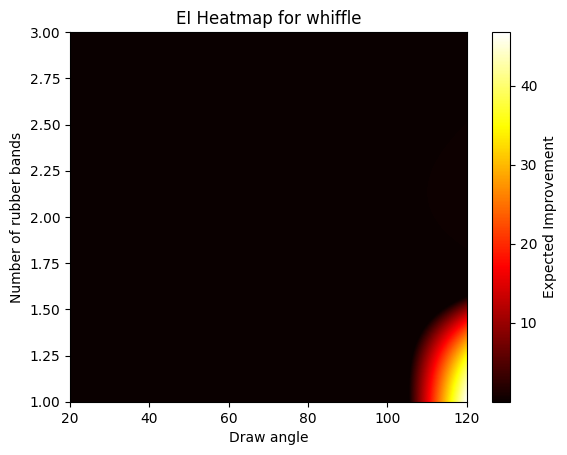

In [37]:
EI_heatmaps(gp, factors) #hybrid

### Select a policy

In [41]:
policy = "Exploration" #"Exploitation", "Exploration", or "EI"

### Select the next experiment to perform based on the chosen policy

In [42]:
X_new, obj_val = plan_next_experiment(gp, factors, policy)

In [43]:
X_new

,draw_angle,projectile,rubber_bands
0,120.0,whiffle,2.0


### Record the distance from the target

In [44]:
y_new = 272#add the distance measurement here

### Update the Gaussian Process with this new experiment

In [45]:
gp = update_model(gp, X_new, y_new, factors)

## Iteration 4

### Plot the heat maps

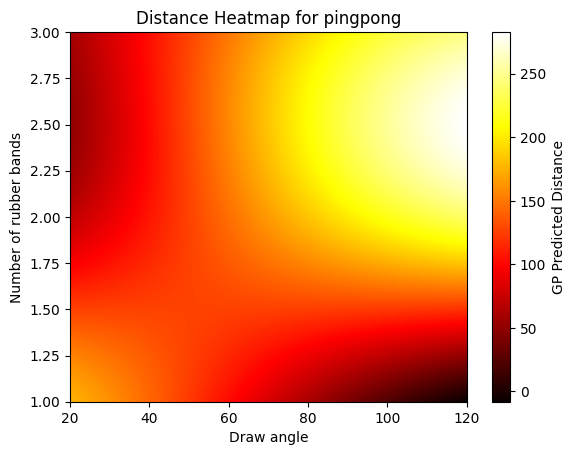

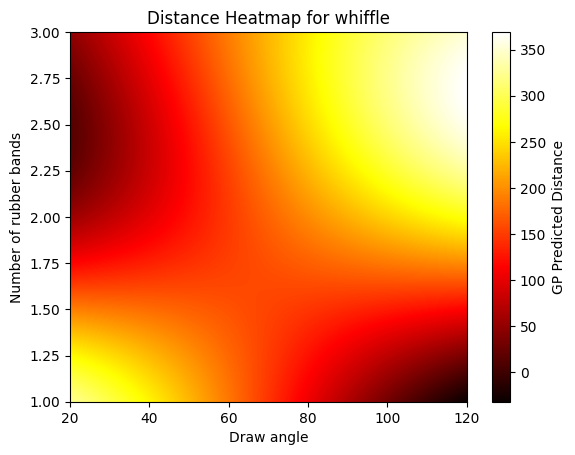

In [46]:
distance_heatmaps(gp, factors) #exploitation

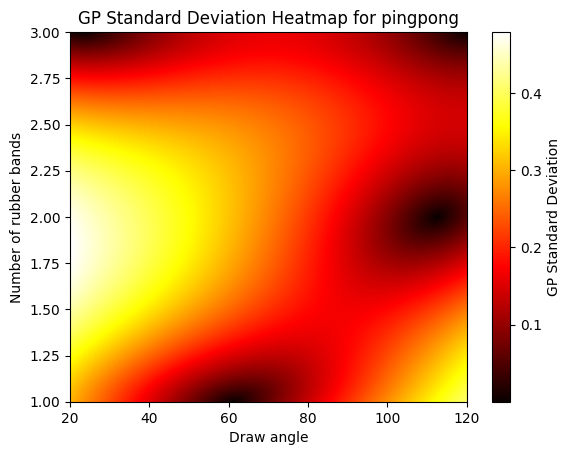

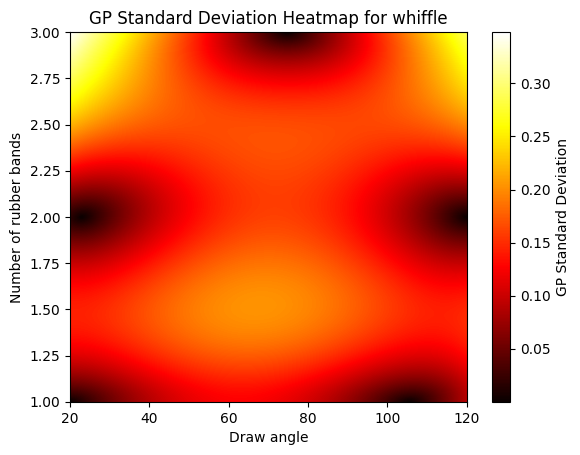

In [47]:
uncertainty_heatmaps(gp, factors) #exploration

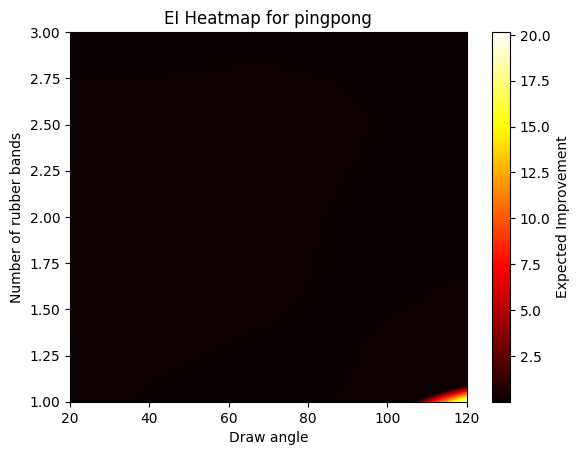

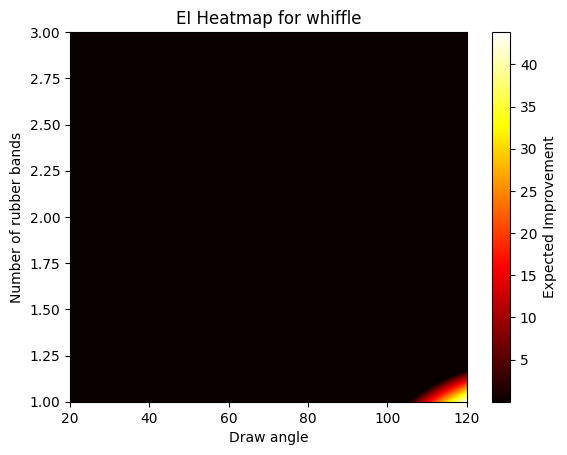

In [48]:
EI_heatmaps(gp, factors) #hybrid

### Select a policy

In [49]:
policy = "Exploration" #"Exploitation", "Exploration", or "EI"

### Select the next experiment to perform based on the chosen policy

In [50]:
X_new, obj_val = plan_next_experiment(gp, factors, policy)

In [51]:
X_new

,draw_angle,projectile,rubber_bands
0,20.0,pingpong,2.0


### Record the distance from the target

In [52]:
y_new = 122#add the distance measurement here

### Update the Gaussian Process with this new experiment

In [53]:
gp = update_model(gp, X_new, y_new, factors)

## Iteration 5

### Plot the heat maps

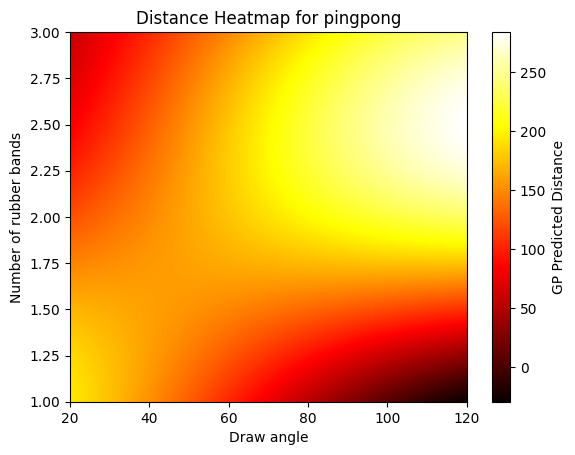

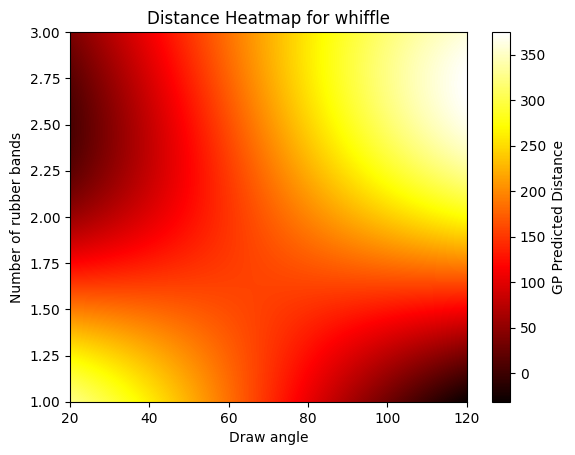

In [54]:
distance_heatmaps(gp, factors) #exploitation

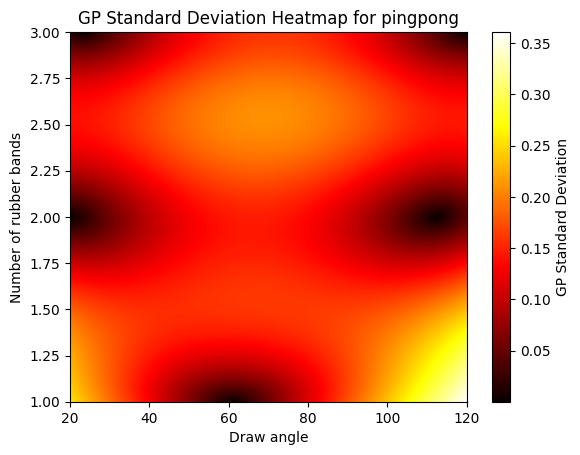

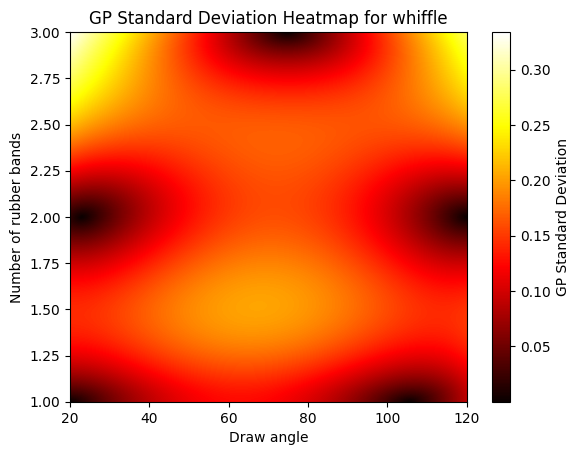

In [55]:
uncertainty_heatmaps(gp, factors) #exploration

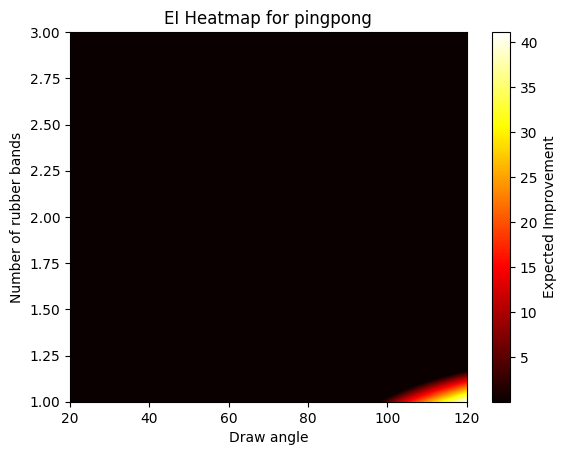

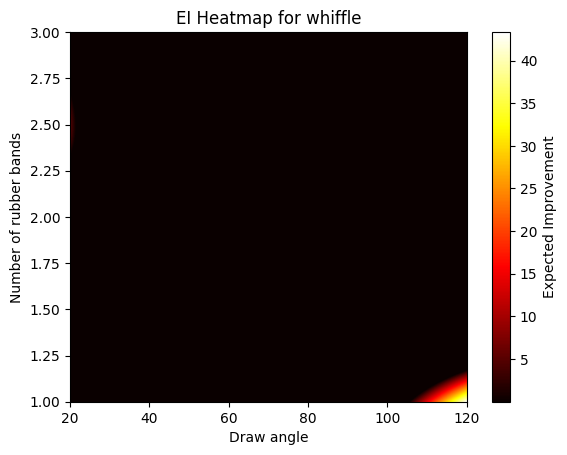

In [56]:
EI_heatmaps(gp, factors) #hybrid

### Select a policy

In [57]:
policy = "Exploration" #"Exploitation", "Exploration", or "EI"

### Select the next experiment to perform based on the chosen policy

In [58]:
X_new, obj_val = plan_next_experiment(gp, factors, policy)

In [59]:
X_new

,draw_angle,projectile,rubber_bands
0,120.0,pingpong,1.0


### Record the distance from the target

In [60]:
y_new = 20#add the distance measurement here

### Update the Gaussian Process with this new experiment

In [61]:
gp = update_model(gp, X_new, y_new, factors)

## Iteration 6

### Plot the heat maps

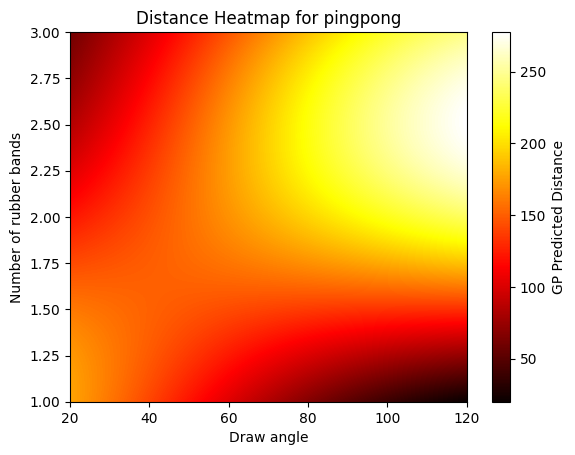

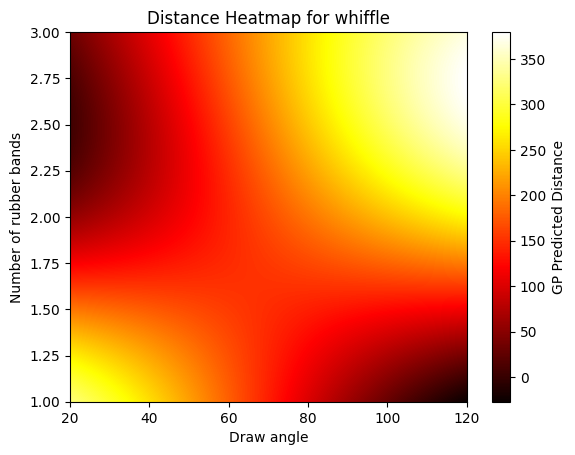

In [62]:
distance_heatmaps(gp, factors) #exploitation

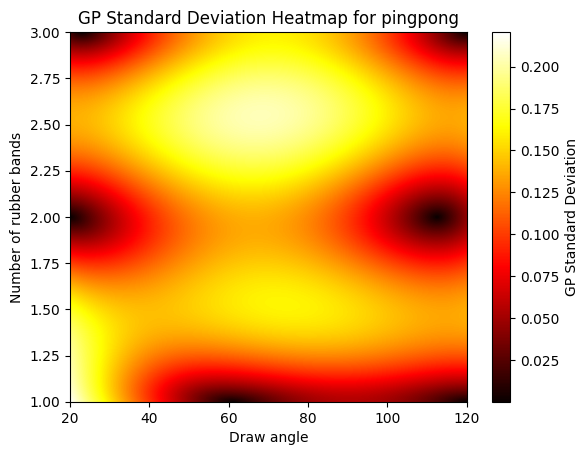

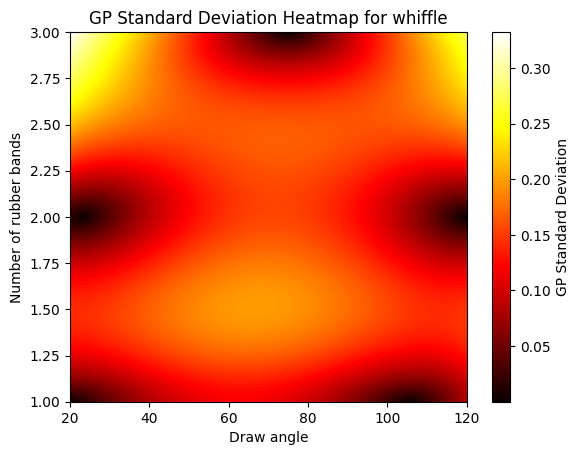

In [63]:
uncertainty_heatmaps(gp, factors) #exploration

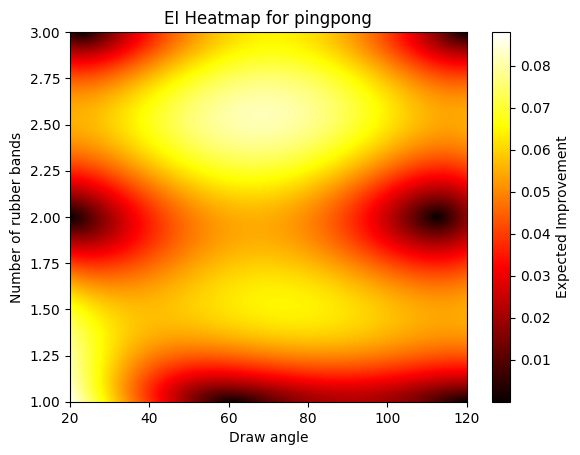

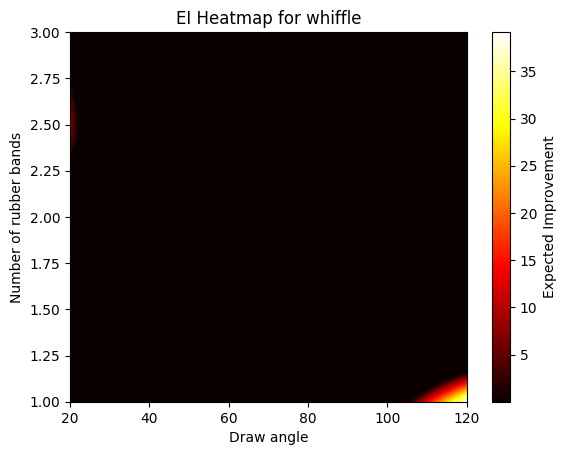

In [64]:
EI_heatmaps(gp, factors) #hybrid

### Select a policy

In [68]:
policy = "Exploration" #"Exploitation", "Exploration", or "EI"

### Select the next experiment to perform based on the chosen policy

In [69]:
X_new, obj_val = plan_next_experiment(gp, factors, policy)

In [70]:
X_new

,draw_angle,projectile,rubber_bands
0,20.0,whiffle,3.0


### Record the distance from the target

In [71]:
y_new = 22#add the distance measurement here

### Update the Gaussian Process with this new experiment

In [72]:
gp = update_model(gp, X_new, y_new, factors)

# Plot the final heat maps

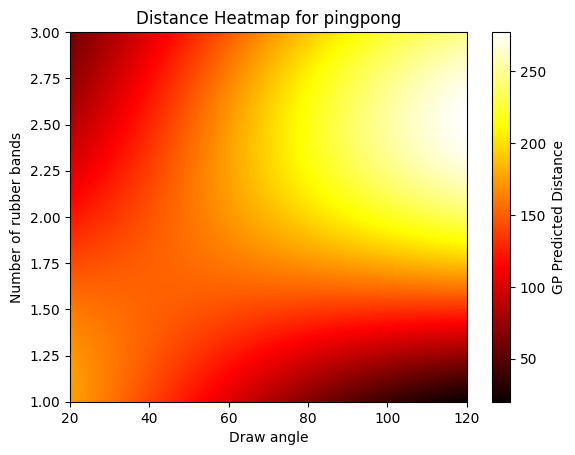

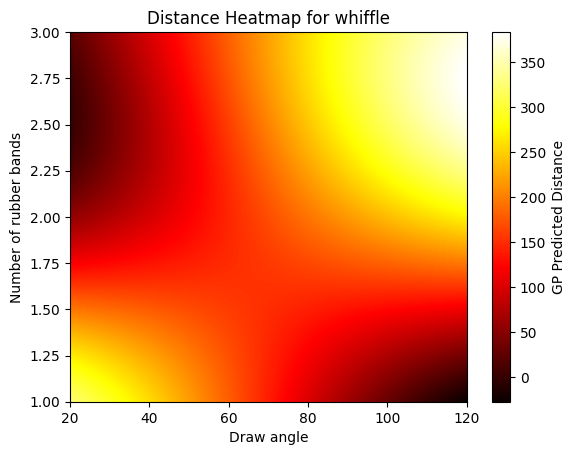

In [73]:
distance_heatmaps(gp, factors) #exploitation

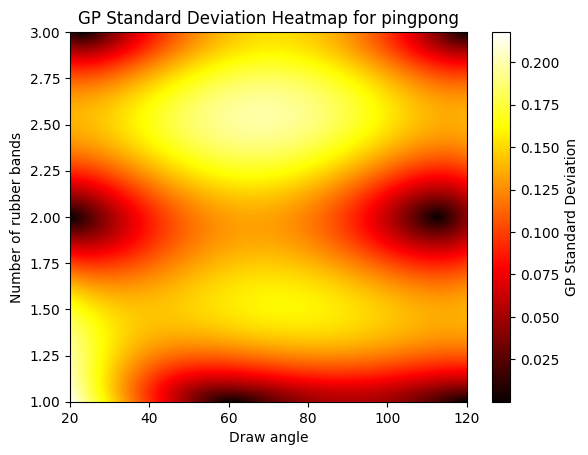

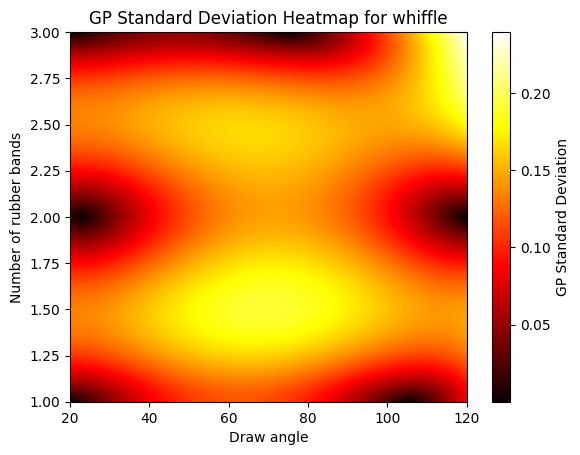

In [74]:
uncertainty_heatmaps(gp, factors) #exploration

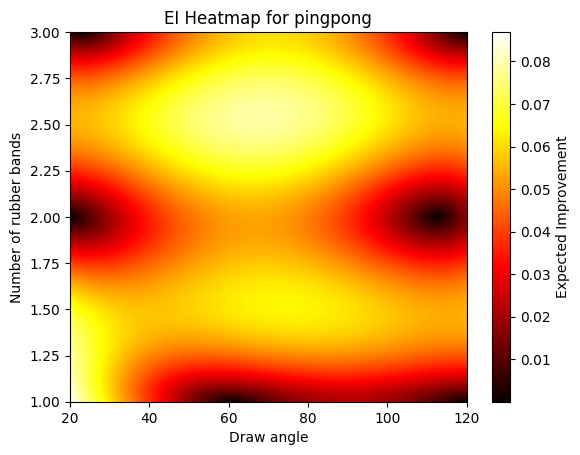

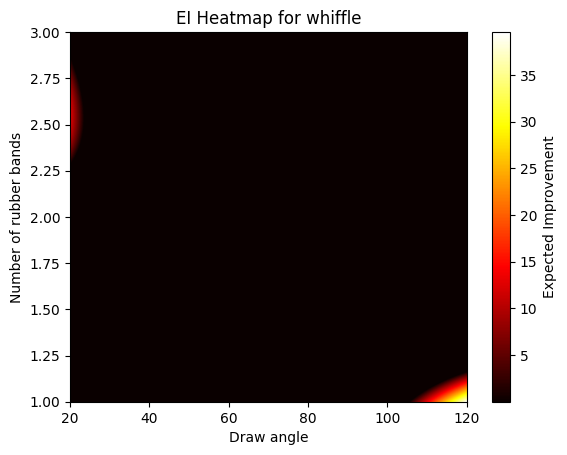

In [75]:
EI_heatmaps(gp, factors) #hybrid

# Perform one final exploitation policy to find the best experiment

In [77]:
policy = "Exploitation"
X_best, obj_val = plan_next_experiment(gp, factors, "Exploitation")
X_best

,draw_angle,projectile,rubber_bands
0,120.0,whiffle,1.0


# Perform the best experiment (X_best) 3 times and record the distances from the target

In [78]:
y_best = [7, 5, 8]

## Calculate mean and standard deviation

In [79]:
np.mean(y_best)

6.666666666666667

In [80]:
np.std(y_best,ddof=1)

1.5275252316519465